# Tutorial: When Linear is Not Enough: The Need for Curves

Regresi Linear adalah alat yang luar biasa. Ia sederhana, mudah diinterpretasikan, dan bekerja dengan sangat baik saat hubungan antara fitur dan target bersifat **linear**.

Tapi, apa yang terjadi ketika hubungannya tidak sesederhana garis lurus? Di dunia nyata, banyak hubungan bersifat **non-linear** atau melengkung.

Di notebook ini, kita akan secara visual dan kuantitatif menunjukkan keterbatasan Regresi Linear dan membangun intuisi mengapa kita membutuhkan model yang lebih fleksibel seperti Regresi Polinomial.

---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menciptakan data sintetis dengan hubungan non-linear yang jelas.
* Menerapkan model Regresi Linear pada data non-linear.
* Menganalisis secara visual mengapa garis lurus gagal menangkap pola yang melengkung.
* Menggunakan metrik evaluasi (seperti R²) untuk membuktikan secara kuantitatif bahwa model linear tidak cocok untuk masalah ini.


---
### 2. Menciptakan Skenario Non-Linear

Mari kita buat dataset di mana hubungannya bukan garis lurus, melainkan sebuah kurva parabola (kuadratik).

**Rumus:** `y = 0.5 * x² + x + 2 + noise`

**linear:** `y=\beta_1*x + \beta_0`

Ini adalah hubungan yang jelas, tetapi tidak bisa didekati dengan baik oleh garis lurus.


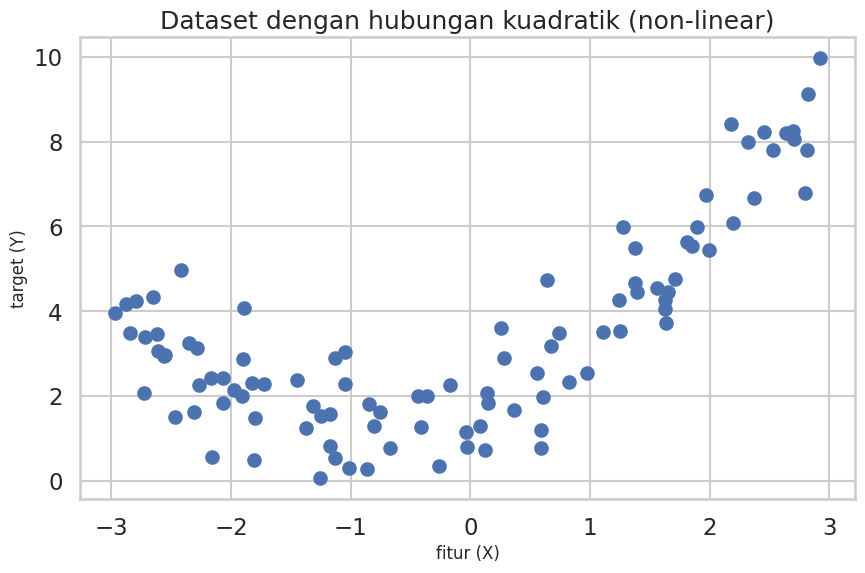

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# atur thema visual
sns.set_theme(style='whitegrid', context='talk')

# membuat data nonlinear
np.random.seed(42)
m = 100;
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# visualisasi
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.title('Dataset dengan hubungan kuadratik (non-linear)', fontsize=18)
plt.xlabel('fitur (X)', fontsize=12)
plt.ylabel('target (Y)', fontsize=12)
plt.show()

Seperti yang bisa kita lihat, data ini jelas membentuk pola parabola atau "U".

---
### 3. Memaksa Model Linear pada Data Non-Linear

Sekarang, mari kita coba paksakan model `LinearRegression` untuk "belajar" dari data ini. Apa yang akan terjadi? Model ini hanya tahu cara menggambar satu hal: **garis lurus**. Ia akan mencoba menemukan garis lurus terbaik yang bisa ia gambar untuk meminimalkan kesalahan pada data yang melengkung ini.


In [23]:
linear_model = LinearRegression()
linear_model.fit(X,Y)

# prediksi menggunakan model linear
Y_pred_linear = linear_model.predict(X)

### 4. Menganalisis Kegagalan Secara Visual

Mari kita plot garis prediksi dari model linear di atas data asli kita.


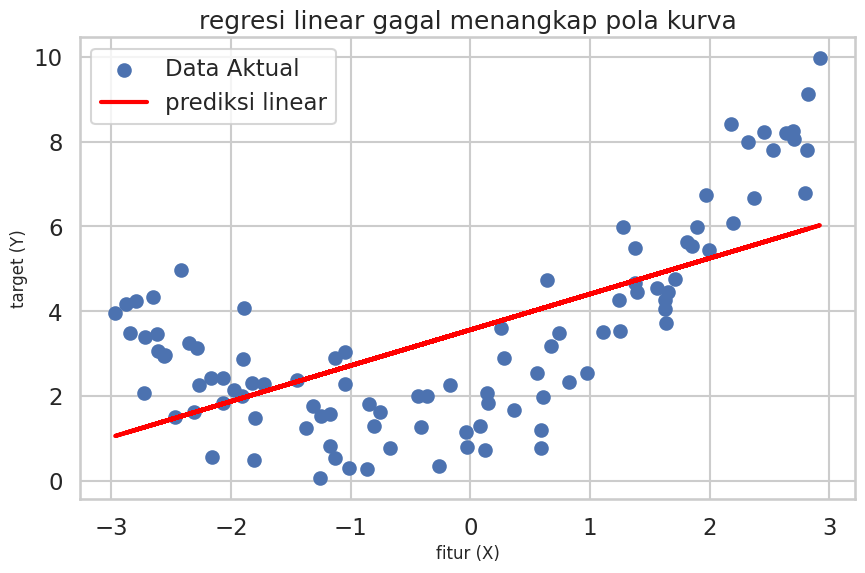

In [24]:
# data aktual
plt.figure(figsize=(10,6))
plt.scatter(X,Y,label='Data Aktual')
plt.plot(X,Y_pred_linear,color='red',linewidth=3,label='prediksi linear')

plt.title('regresi linear gagal menangkap pola kurva')
plt.xlabel('fitur (X)', fontsize=12)
plt.ylabel('target (Y)', fontsize=12)
plt.legend()
plt.show()

#### **Analisis Visual:**

Hasilnya sangat jelas. Garis merah adalah upaya terbaik dari model linear, tetapi ia gagal total:
* Ia **under-predict** (terlalu rendah) di kedua ujung data (kiri dan kanan).
* Ia **over-predict** (terlalu tinggi) di bagian tengah data.

Ini adalah contoh klasik dari **underfitting**: model terlalu sederhana untuk menangkap kompleksitas pola dalam data.


---
### 5. Membuktikan Kegagalan Secara Kuantitatif

Visualisasi sudah meyakinkan, tetapi mari kita gunakan metrik R² untuk mengukur seberapa buruk performa model ini.


In [25]:
# hitung r2 score
r2_linear = r2_score(Y,Y_pred_linear)
print(f'score r2 model linear: {r2_linear:.4f}')

score r2 model linear: 0.4260


#### **Analisis Kuantitatif:**

Skor R² sekitar **0.42** sangatlah rendah. Ini berarti model Regresi Linear kita hanya mampu menjelaskan sekitar **42%** dari variasi dalam data. Sisa 58% variasi lainnya sama sekali tidak tertangkap oleh model. Ini adalah bukti numerik bahwa model kita tidak cocok.


---
### Kesimpulan: Kebutuhan akan Kurva

Kita telah membuktikan secara visual dan kuantitatif bahwa Regresi Linear tidak cukup ketika data memiliki pola yang kompleks dan non-linear. Memaksa model yang salah pada masalah yang salah akan menghasilkan prediksi yang buruk dan kesimpulan yang tidak dapat diandalkan.

Ini membuka jalan bagi kebutuhan akan model yang lebih fleksibel, yang dapat "membengkok" dan menyesuaikan diri dengan pola kurva.

**Selanjutnya:**
Di subchapter berikutnya, kita akan belajar tentang **Polynomial Features**, sebuah trik cerdas yang memungkinkan kita menggunakan mesin Regresi Linear yang sama untuk menciptakan model kurva yang kuat.
